In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 1. Завантажити дані, вивести назви колонок і розмір датасета
df = pd.read_csv("milknew.csv")
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


2. Опрацювати пропуски (по можливості заповнити їх або видалити)
Як бачимо, пропуски відсутні

<AxesSubplot: >

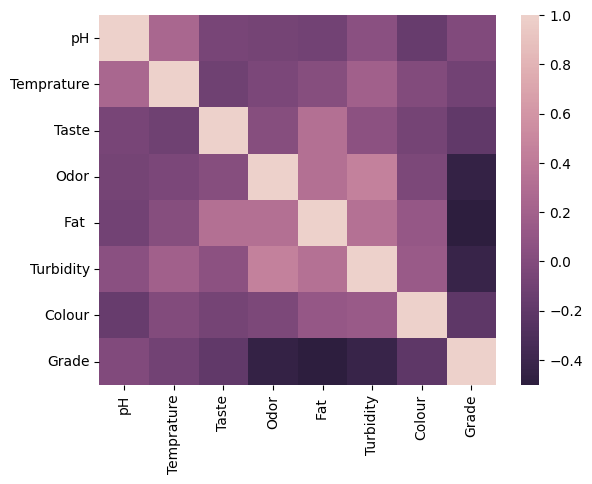

In [2]:
# 3.1 Побудувати графік (heatmap), що відображає кореляції ознак між собою і з цільовою змінною (розміткою); 

import seaborn as sns
from sklearn.preprocessing import LabelEncoder

#Перед цим перетворимо стовпчик Grade в числа
df_copy = df.copy()
df_copy["Grade"] = LabelEncoder().fit_transform(df_copy["Grade"])

sns.heatmap(df_copy.corr(), cmap=sns.cubehelix_palette(reverse=True, as_cmap=True))

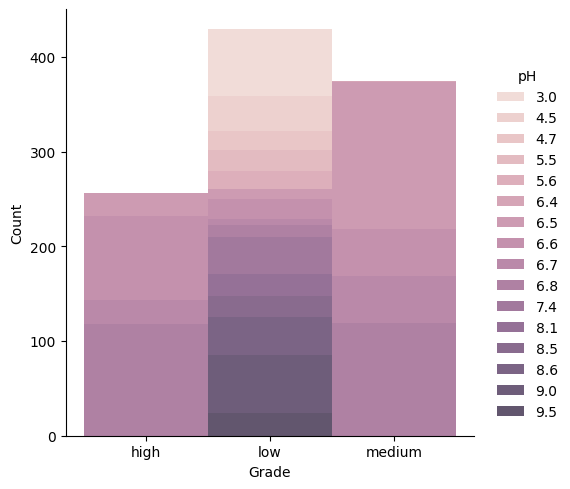

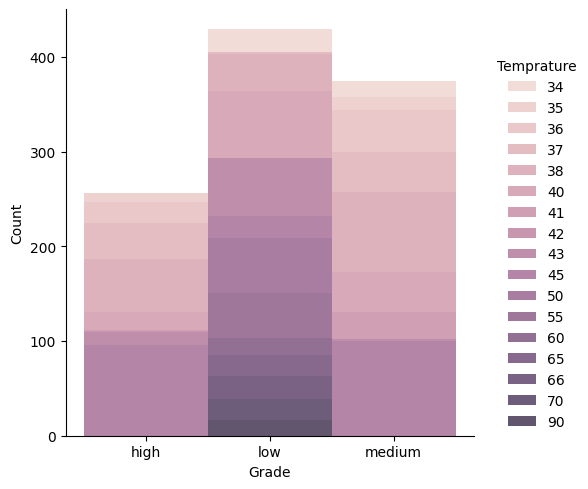

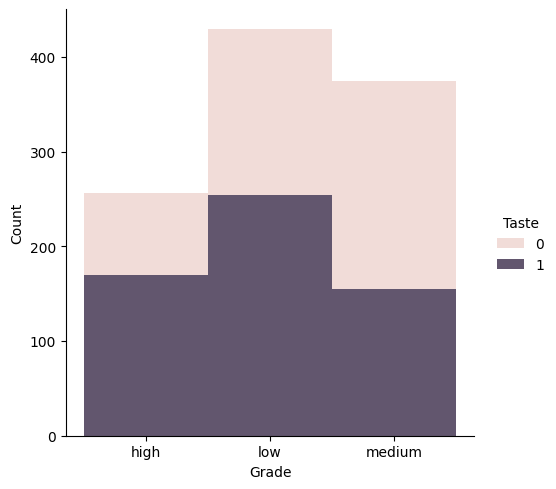

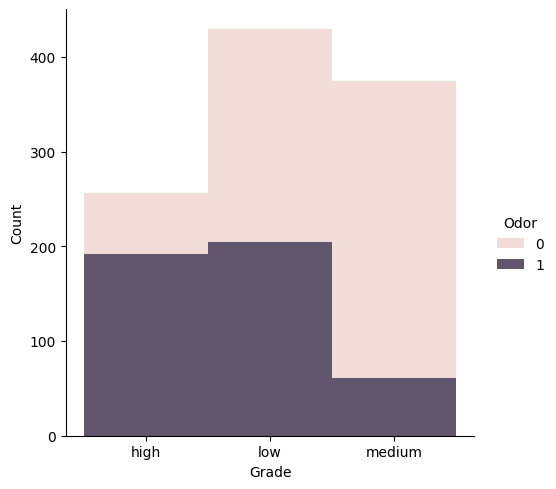

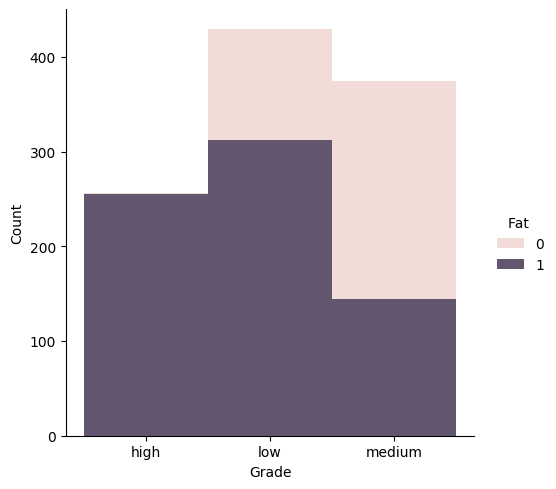

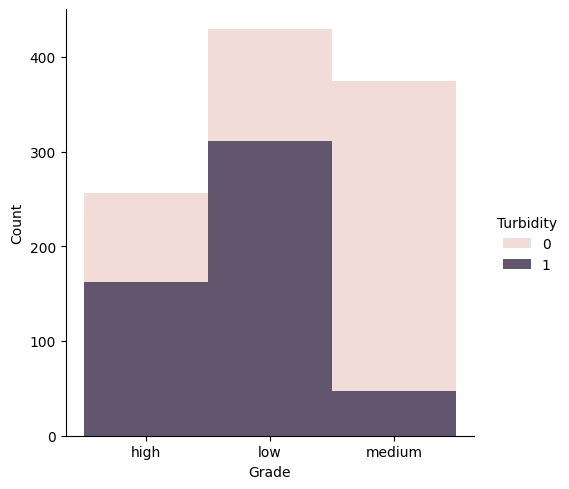

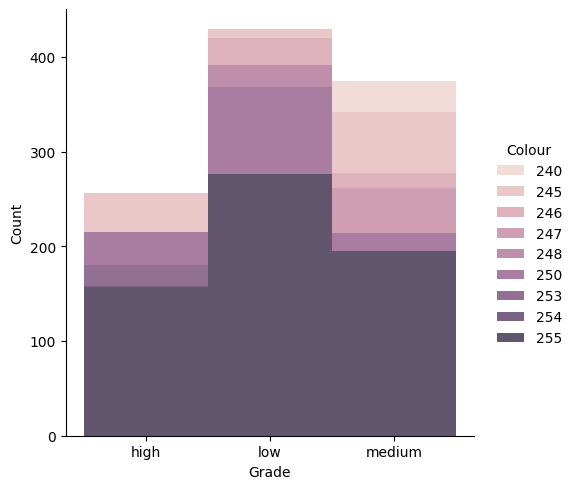

In [3]:
# 3.2 Побудувати гістограму розподілу ознак відносно цільової змінної

for i in list(df)[:-1]:
    sns.displot(x="Grade", hue=i, data=df, multiple='stack', linewidth=0, palette=sns.cubehelix_palette(len(df[i].unique())))

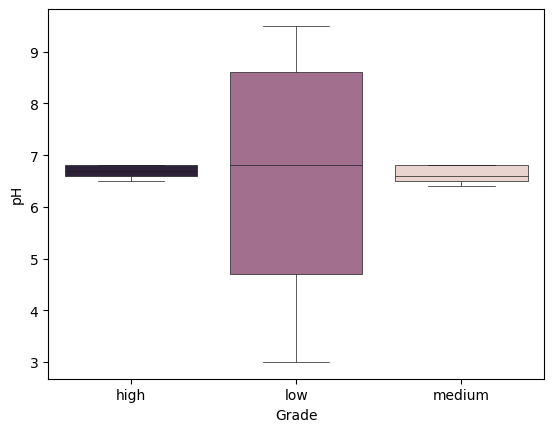

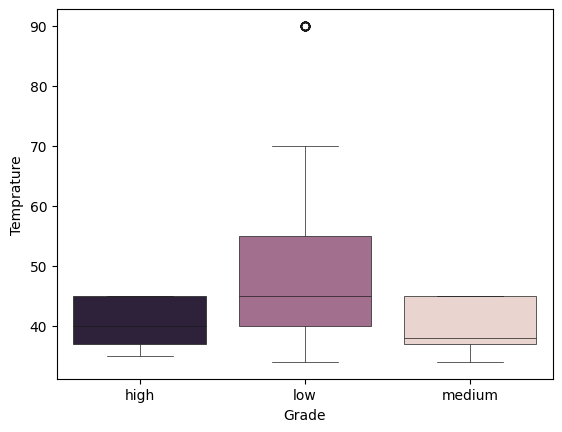

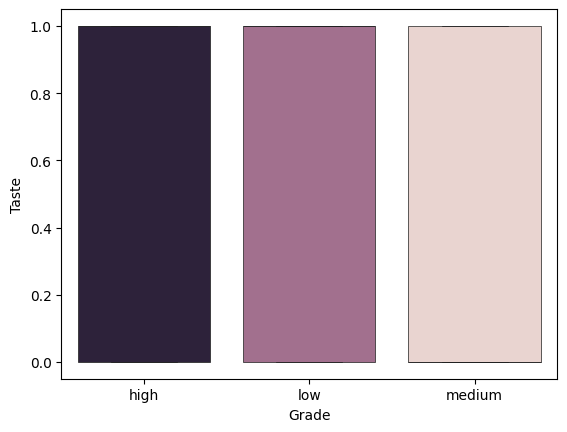

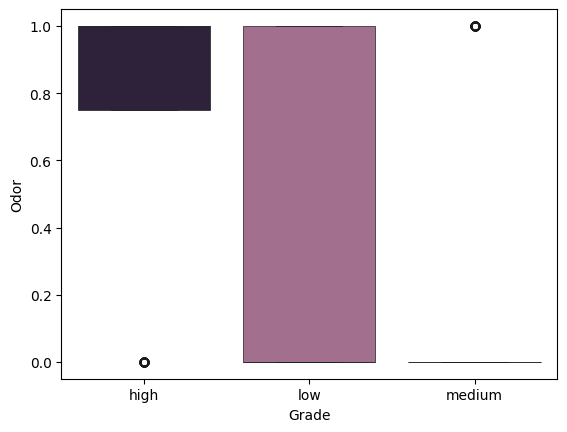

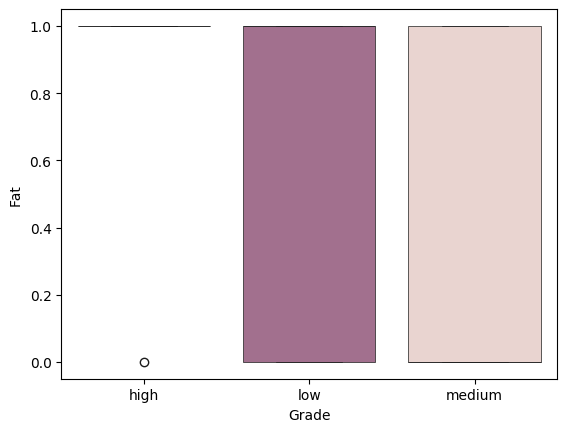

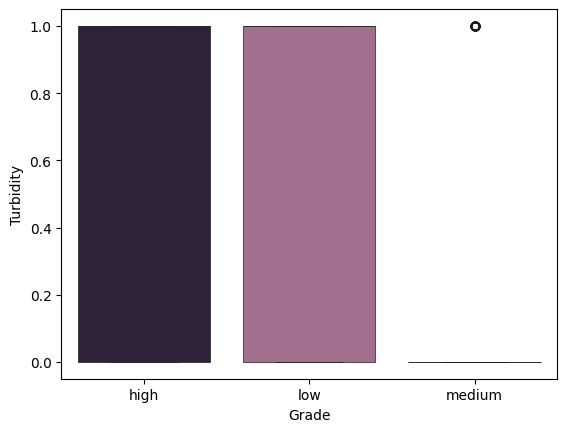

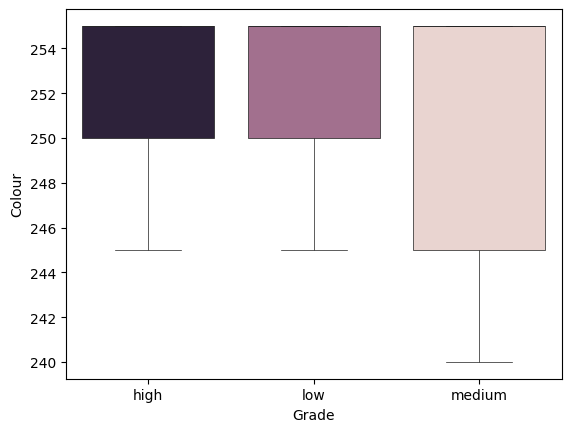

In [4]:
# 3.3 Побудувати boxplot-и ознак відносно цільової змінної

for i in list(df)[:-1]:
    figure = plt.figure()
    sns.boxplot(x="Grade", y=i, data=df, linewidth=0.5, palette=sns.cubehelix_palette(3, reverse=True))

In [5]:
# 4. Нормалізувати дані

df_copy.info()
df_copy

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   int32  
dtypes: float64(1), int32(1), int64(6)
memory usage: 62.2 KB


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,2
1055,6.7,38,1,0,1,0,255,0
1056,3.0,40,1,1,1,1,255,1
1057,6.8,43,1,0,1,0,250,0


In [6]:
# 5. Провести навчання класифікаторів

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_copy.drop('Grade', axis = 1)
y = df_copy['Grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test) 


In [7]:
# 5.1.1 kNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

knn_model = KNeighborsClassifier()
knn_model.fit(scaled_X_train, y_train)

y_pred = knn_model.predict(scaled_X_test)

print(confusion_matrix(y_test, y_pred))
print('\n', classification_report(y_test, y_pred))
print('accuracy: ', accuracy_score(y_test, y_pred))


[[ 83   0   0]
 [  1 121   2]
 [  0   1 110]]

               precision    recall  f1-score   support

           0       0.99      1.00      0.99        83
           1       0.99      0.98      0.98       124
           2       0.98      0.99      0.99       111

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318

accuracy:  0.9874213836477987


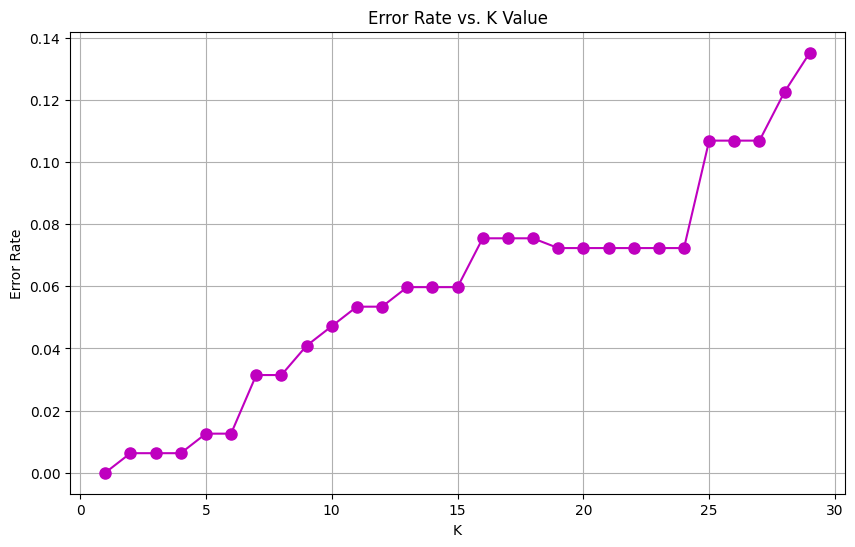

In [10]:
# 5.1.2 Сhoose k

error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train,y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=8, color='m')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [11]:
# 5.1.3 Best k

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(scaled_X_train,y_train)

y_pred = knn_model.predict(scaled_X_test)

print(confusion_matrix(y_test, y_pred))
print('\n', classification_report(y_test, y_pred))
print('accuracy: ', accuracy_score(y_test, y_pred))

[[ 83   0   0]
 [  0 124   0]
 [  0   0 111]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00       124
           2       1.00      1.00      1.00       111

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318

accuracy:  1.0


In [12]:
# 5.2.1 Decision Tree

from sklearn.tree import DecisionTreeClassifier, plot_tree

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('\n', classification_report(y_test, y_pred))
print('accuracy: ', accuracy_score(y_test, y_pred))


[[ 83   0   0]
 [  0 124   0]
 [  1   0 110]]

               precision    recall  f1-score   support

           0       0.99      1.00      0.99        83
           1       1.00      1.00      1.00       124
           2       1.00      0.99      1.00       111

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318

accuracy:  0.9968553459119497


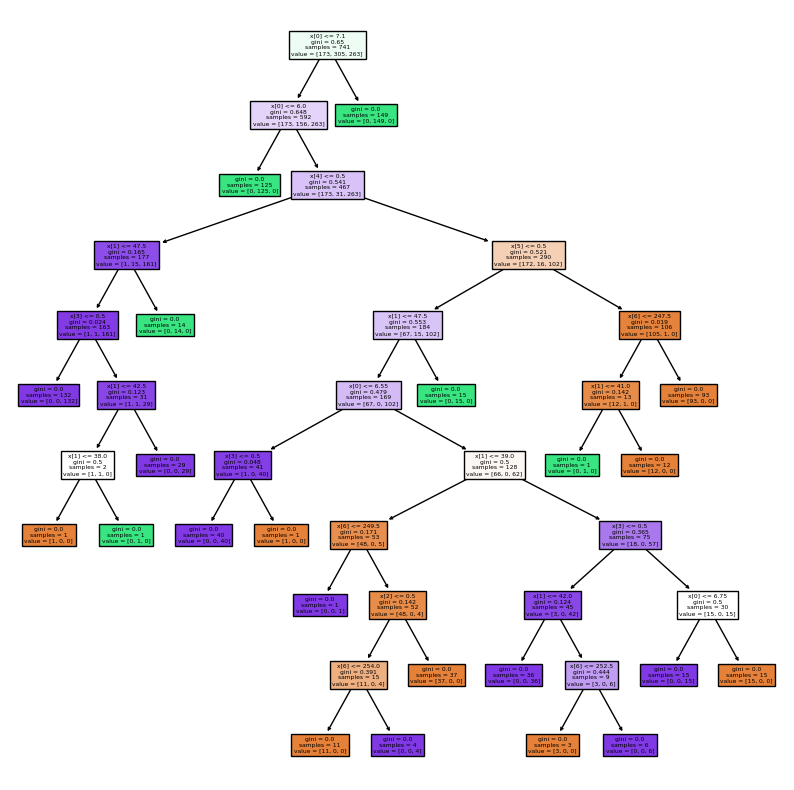

In [13]:
# 5.2.2 Visualization

plt.figure(figsize = (10, 10))
plot_tree(tree_model, filled = True)
plt.show()

In [14]:
# 5.3.1 SVM

from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(scaled_X_train, y_train)

y_pred = svc_model.predict(scaled_X_test)

print(confusion_matrix(y_test, y_pred))
print('\n', classification_report(y_test, y_pred))
print('accuracy: ', accuracy_score(y_test, y_pred))

[[ 79   0   4]
 [  1 120   3]
 [  7   0 104]]

               precision    recall  f1-score   support

           0       0.91      0.95      0.93        83
           1       1.00      0.97      0.98       124
           2       0.94      0.94      0.94       111

    accuracy                           0.95       318
   macro avg       0.95      0.95      0.95       318
weighted avg       0.95      0.95      0.95       318

accuracy:  0.9528301886792453


In [15]:
# 5.3.2 GridSearch

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid)
grid.fit(scaled_X_train, y_train)
print(grid.best_params_, '\n')

grid_predictions = grid.predict(scaled_X_test)

print(confusion_matrix(y_test, grid_predictions))
print('\n', classification_report(y_test, grid_predictions))
print('accuracy: ', accuracy_score(y_test, grid_predictions))

{'C': 10, 'gamma': 1, 'kernel': 'rbf'} 

[[ 83   0   0]
 [  0 124   0]
 [  0   1 110]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       0.99      1.00      1.00       124
           2       1.00      0.99      1.00       111

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318

accuracy:  0.9968553459119497


In [16]:
# 5.4 Random Forest

from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier()
forest_model.fit(scaled_X_train, y_train)

y_pred = forest_model.predict(scaled_X_test)

print(confusion_matrix(y_test, grid_predictions))
print('\n', classification_report(y_test, grid_predictions))
print('accuracy: ', accuracy_score(y_test, grid_predictions))

[[ 83   0   0]
 [  0 124   0]
 [  0   1 110]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       0.99      1.00      1.00       124
           2       1.00      0.99      1.00       111

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318

accuracy:  0.9968553459119497


In [17]:
# 5.5 AdaBoost

from sklearn.ensemble import AdaBoostClassifier

adaboost_model = AdaBoostClassifier()
adaboost_model.fit(scaled_X_train, y_train)

y_pred = adaboost_model.predict(scaled_X_test)

print(confusion_matrix(y_test, grid_predictions))
print('\n', classification_report(y_test, grid_predictions))
print('accuracy: ', accuracy_score(y_test, grid_predictions))

[[ 83   0   0]
 [  0 124   0]
 [  0   1 110]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       0.99      1.00      1.00       124
           2       1.00      0.99      1.00       111

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318

accuracy:  0.9968553459119497
